# GDP Assignment_Cohort 13_Aug 2019

## Part I-A 

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# please change the 'path' variable below as per location of a file for statewise GDP file (Part I -A )
path = "g:\\ds\\GDP Assignment\\State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv"

# please change the 'path' variable below as per location of a file for drop out rate (Part II)
path_DOR = "g:\\ds\\GDP Assignment\\State UT-wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv"

# read statewise GDP file
df_GDP_Master = pd.read_csv(path)

# 1. Remove the rows for the year 2016-2017

df_GDP_Master = df_GDP_Master.drop(df_GDP_Master.index[df_GDP_Master['Duration']== "2016-17"])

# 2. Average growth of states for the duration 2013-14, 2014-15 and 2015-16 and transforming the dataframe to plot the graph

df_Growth = df_GDP_Master[(df_GDP_Master['Items  Description']=='(% Growth over previous year)')& ((df_GDP_Master['Duration']=='2013-14')|(df_GDP_Master['Duration']=='2014-15')|(df_GDP_Master['Duration']=='2015-16')) ]
col = list(df_Growth['Duration'])
df_Growth = df_Growth.drop(['Items  Description','Duration','West Bengal1'], axis = 1)   
df_Growth = df_Growth.T
df_Growth.columns = col
df_Growth.insert(0,'States',df_Growth.index)
df_Growth = df_Growth.reset_index(drop = True)
df_Growth['Average_Growth'] = round(df_Growth.mean(axis = 1),2)
df_Growth.sort_values(by = 'Average_Growth',ascending = False,inplace = True)

# take out All India GDP data
df_All_India_GDP = df_Growth[df_Growth['States']== 'All_India GDP']
df_Growth = df_Growth[df_Growth['States']!= 'All_India GDP']

df_Growth

,States,2013-14,2014-15,2015-16,Average_Growth
17,Mizoram,23.10,12.30,NaN,17.70
25,Tripura,18.14,15.92,NaN,17.03
18,Nagaland,21.98,10.85,NaN,16.42
15,Manipur,17.83,11.39,NaN,14.61
1,Arunachal Pradesh,16.38,14.79,12.07,14.41
11,Karnataka,18.24,12.70,11.42,14.12
0,Andhra Pradesh,12.85,13.40,15.85,14.03
28,Andaman & Nicobar Islands,16.68,10.89,NaN,13.78
4,Chhattisgarh,16.44,13.69,10.98,13.70
3,Bihar,12.30,17.92,10.59,13.60


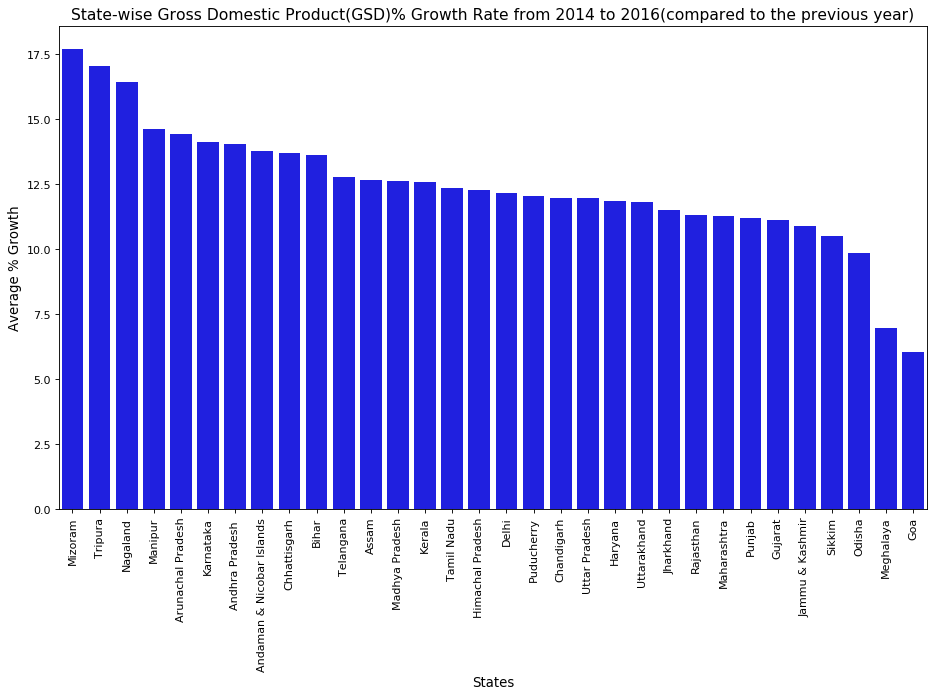

In [344]:
# Plot Average of % growth for all states

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y = 'Average_Growth',x = 'States',data = df_Growth,color = "blue")
plt.xticks(fontsize=10, rotation=90)
plt.title('State-wise Gross Domestic Product(GSD)% Growth Rate from 2014 to 2016(compared to the previous year)',fontsize = 14)
plt.xlabel("States",fontsize = 12)
plt.ylabel("Average % Growth",fontsize = 12)
plt.show()

#### Notes for graph 'State-wise Gross Domestic Product(GSD) % Growth Rate from 2014 to 2016(compared to the previous year)' : 
1)Percentage growth for the year 2015-2016 data was unavailable for Mizoram,Tripura,Nagaland,Manipur,Andaman & Nicobar   Islands,Himachal Pradesh,Rajasthan,Maharashtra,Punjab.<br>

2)For West Bengal for all years data was unavailable,hence not considered.

3)Imputing data marked as NA may lead to misleading results hence kept as it is.


#### Key points from the graph :
1)If we consider states with all the years data available,Arunachal Pradesh (14.42),Karnataka(14.12)and Andhra Pradesh(14.03) are with highest average growth rate, however, Andhra Pradesh is consistantly perfoming over the years with % growth rate from 2014 to 2016 are 12.85,13.40,15.85 respectively

2)On the other side Odisha,Meghalaya and Goa are the states with lowest Average growth rate ,among them Odisha consistently struggling to grow over the years. %growth rate for Odisha from 2014 to 2016 are 12.95,10.37,6.19 respectively


               2013-14  2014-15  2015-16  Average_Growth
States                                                  
All_India GDP    12.97    10.65     9.99           11.20
Maharashtra      13.74     8.78      NaN           11.26


<Figure size 1120x480 with 0 Axes>

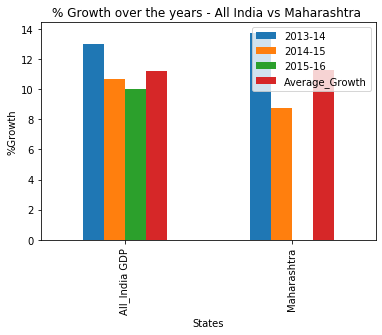

In [349]:
#2.2 Homestate vs National Average

df_Homestate = df_Growth[df_Growth['States'] == 'Maharashtra']
df_All_India_GDP = df_All_India_GDP.append(df_Homestate)
df_All_India_GDP = df_All_India_GDP.drop_duplicates()
df_All_India_GDP.set_index('States',inplace = True,drop = True)
print(df_All_India_GDP)

# plot the graph for % growth rate over the years

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
df_All_India_GDP.plot(y = df_All_India_GDP.columns,kind = "bar",use_index=True)
plt.ylabel("%Growth")
plt.title("% Growth over the years - All India vs Maharashtra ")
plt.show()

#### Note for the graph "% Growth over the years - All India vs Maharashtra":<br>
1)% Growth Value is unavailable for Homestate(Maharashtra) for the year 2015-2016. <br>
2)There is no significant difference between growth rate of Maharashtra when compared to National Growth rate over the years. Average % growth for Maharashtra is 11.26% and for All India growth rate is 11.20%


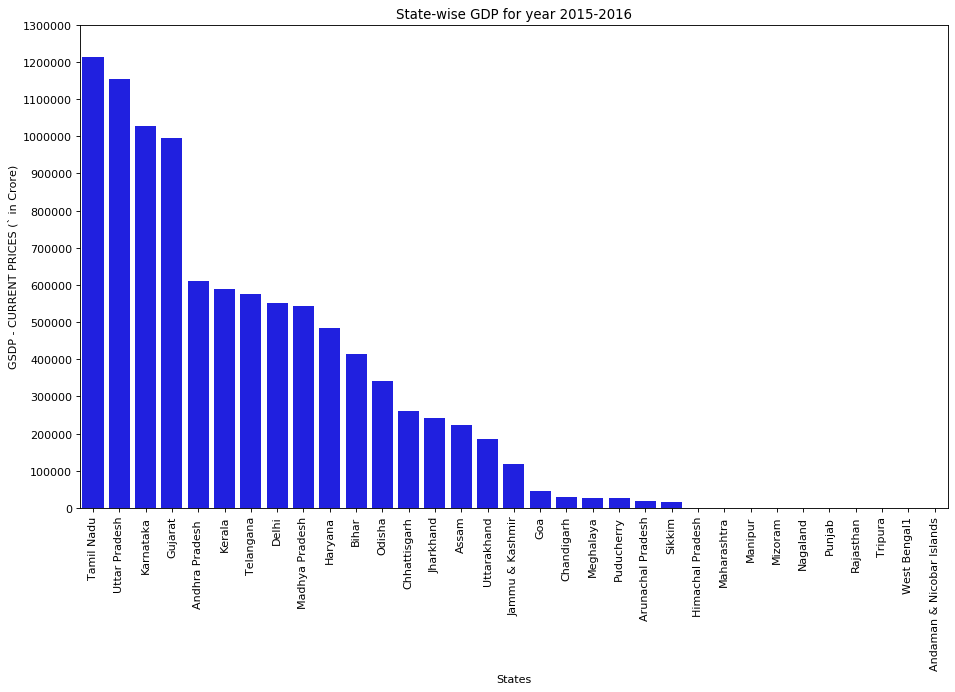

In [338]:
#3.Plot the total GDP of the states for the year 2015-16 :
df_GSDP = df_GDP_Master[(df_GDP_Master['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')& (df_GDP_Master['Duration']=='2015-16') ]
col = list(df_GSDP['Duration'])
df_GSDP = df_GSDP.drop(['Items  Description','Duration'], axis = 1)   
df_GSDP = df_GSDP.T
df_GSDP.columns = col
df_GSDP.insert(0,'States',df_GSDP.index)
df_GSDP.sort_values(by = '2015-16',ascending = False,inplace = True)
df_GSDP.reset_index(drop = True,inplace = True)
All_india_GDP = df_GSDP['2015-16'][0]
df_GSDP = df_GSDP[1:]

# plot GSDP for all states
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x ='States',y  = '2015-16' , data = df_GSDP,color = "blue")
plt.xticks(fontsize=10, rotation=90)
plt.title('State-wise GDP for year 2015-2016')
plt.xlabel("States")
plt.ylabel("GSDP - CURRENT PRICES (` in Crore)")
plt.yticks(np.arange(0,1400000,100000))
plt.show()


#### Notes for the graph 'State-wise GDP for year 2015-2016' :<br>
1)Values for few states and UT were unavailable (marked as NA) in data, has not been imputed. Can be seen no bar against it in plot.

#### Key points from the graph : 

1)Top five states with highest GSDP for the year 2015-2016 are Tamil Nadu(1212668.0),Uttar Pradesh(1153795.0),Karnataka(1027068.0),Gujarat(994316.0),Andhra Pradesh(609934.0).<br>
2)whereas bottom 5 states with GSDP are Chandigarh(30304.0),Meghalaya(26745.0),Puducherry(26533.0),Arunachal Pradesh(18784.0),Sikkim(16637.0).
3)States from West and South are contributing more towards total GDP as compared to North and East states.

# Part I-B

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

folder = r'G:\ds\GDP Assignment\Indian States'
GSDP_allfiles = glob.glob(folder+"\\*csv")

list_GSDP = []
# this is filter list to filter out sectors and subsectors from master dataframe
filter_list = [str(x) for x in range (1,18)]+ ["Total"]+[str(x).replace("0","") for x in np.arange(1.,12.,1.)]

for filename in GSDP_allfiles : 
    df = pd.read_csv(filename,encoding = 'unicode_escape')
    df = df[['S.No.','Item','2014-15']]
    df = df.loc[ df['S.No.'].apply(lambda x : True if x.strip() in filter_list else False)]
    df = df.iloc[:,1:]
    df = df.T
    header = df.iloc[0]
    df.columns = header
    df = df[1:]
    df.insert(0,'State',filename.split("\\")[-1].split("-")[1])
    df= df.reset_index(drop = True)
    list_GSDP.append(df)
df_GSDP_detail = pd.concat(list_GSDP,axis=0,ignore_index=True,sort = False)

#Filter UT's from the data

df_GSDP_detail = df_GSDP_detail[(df_GSDP_detail['State']!= 'Chandigarh' )&(df_GSDP_detail['State']!= 'Delhi' )&(df_GSDP_detail['State']!= 'Puducherry' )]
df_GSDP_detail.reset_index(inplace = True,drop = True)
df_percapita = df_GSDP_detail[['State','Per Capita GSDP (Rs.)']]

#convert the 'Per Capita GSDP (Rs.)' to int type
df_percapita['Per Capita GSDP (Rs.)'].astype(int)

# sort the data by 'Per Capita GSDP (Rs.)' 
df_percapita = df_percapita.sort_values(by = 'Per Capita GSDP (Rs.)',ascending = False)
df_percapita.reset_index(inplace = True,drop = True)

df_percapita


,State,Per Capita GSDP (Rs.)
0,Goa,271793
1,Sikkim,240274
2,Haryana,164077
3,Kerala,154778
4,Uttarakhand,153076
5,Maharashtra,152853
6,Himachal_Pradesh,147330
7,Tamil_Nadu,146503
8,Karnataka,145141
9,Gujarat,141263


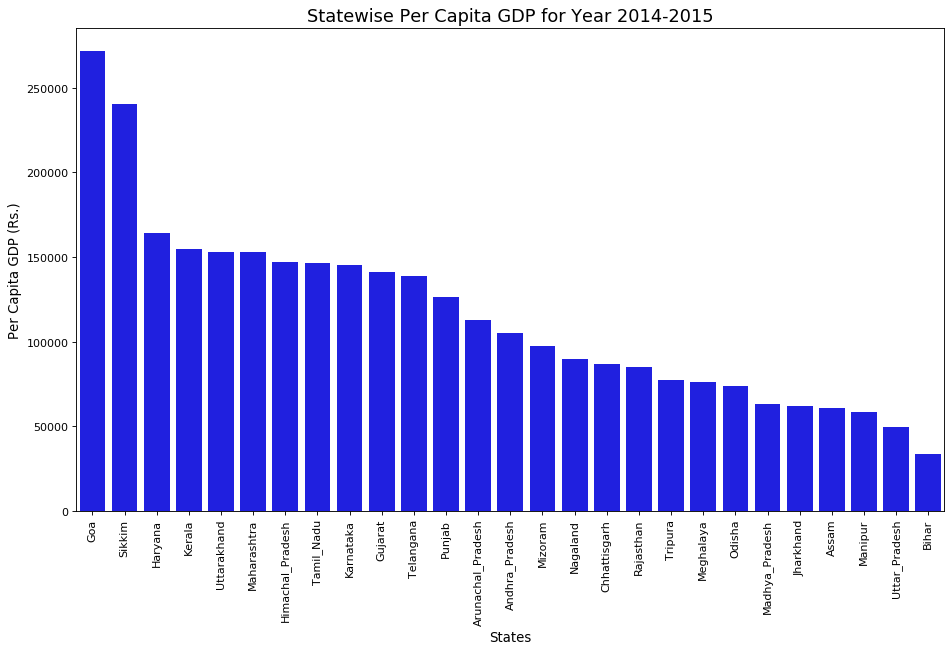

In [390]:
# Plot Per Capita GSDP for all states

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y = 'Per Capita GSDP (Rs.)',x = 'State',data = df_percapita,color = "blue")
plt.xticks(fontsize=10, rotation=90)
plt.title('Statewise Per Capita GDP for Year 2014-2015',fontsize=16)
plt.xlabel("States",fontsize=12)
plt.ylabel("Per Capita GDP (Rs.)",fontsize=12)
plt.show()


Notes for graph GDP Per Capita for Year 2014-2015 as below :

1. Top five states with per Capita GDP are Goa(Rs.271793), Sikkim(Rs.240274), Haryana(Rs.164077.0), Kerala(Rs.154778), Uttarakhand(Rs.153076.0).
2. Bottom five states with per Capita GDP are Jharkhand(Rs.62091), Assam(Rs.60621), Manipur(Rs.58442.0), Uttar_Pradesh(Rs.49450), Bihar(Rs.33954). 
3. Ratio of highest per Capita GDP to lowest is 1:0.12 . 
4. There is a huge gap between states with highest per capita GDP and lowest per capita GDP. Per Capita GDP for the Bihar is just a 12 % of the Per Capita GDP of Goa.


In [384]:
#Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

df_GDP_Contri = df_GSDP_detail[['State','Primary','Secondary','Tertiary','Gross State Domestic Product']]

# sort values by 'Gross State Domestic Product'
df_GDP_Contri = df_GDP_Contri.sort_values(by = 'Gross State Domestic Product',ascending = False)

# convert the columns in type float and roundoff to 2 decimal places
df_GDP_Contri['Primary'] = df_GDP_Contri['Primary'].astype(int)
df_GDP_Contri['Secondary'] = df_GDP_Contri['Secondary'].astype(int)
df_GDP_Contri['Tertiary'] = df_GDP_Contri['Tertiary'].astype(int)

#find contribution of each sector
df_GDP_Contri['Gross State Domestic Product'] = df_GDP_Contri['Gross State Domestic Product'].astype(int)
df_GDP_Contri.loc[:,'Primary_Contry'] = (100*(df_GDP_Contri['Primary']/df_GDP_Contri['Gross State Domestic Product'])).astype(float).round(2)
df_GDP_Contri.loc[:,'Secondary_Contry'] = (100*(df_GDP_Contri['Secondary']/df_GDP_Contri['Gross State Domestic Product'])).astype(float).round(2)
df_GDP_Contri.loc[:,'Tertiary_Contry'] = (100*(df_GDP_Contri['Tertiary']/df_GDP_Contri['Gross State Domestic Product']).astype(float)).round(2)
df_GDP_Contri.reset_index(drop = True,inplace = True)

df_GDP_Contri


,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Primary_Contry,Secondary_Contry,Tertiary_Contry
0,Maharashtra,21758383,47445207,88631076,179212165,12.14,26.47,49.46
1,Tamil_Nadu,13329774,32841892,53343788,109256373,12.20,30.06,48.82
2,Uttar_Pradesh,25999255,25548724,45968959,104337115,24.92,24.49,44.06
3,Karnataka,12066304,20484404,50490630,92178806,13.09,22.22,54.77
4,Gujarat,15887187,33023538,30220377,89502727,17.75,36.90,33.76
5,Rajasthan,19113780,13028794,26015812,61219447,31.22,21.28,42.50
6,Andhra_Pradesh,16303716,10488884,22032942,52646842,30.97,19.92,41.85
7,Kerala,6489442,12070040,29673778,52600230,12.34,22.95,56.41
8,Telangana,9133354,9924001,28471410,51117765,17.87,19.41,55.70
9,Madhya_Pradesh,17854020,10044889,18117360,48198169,37.04,20.84,37.59


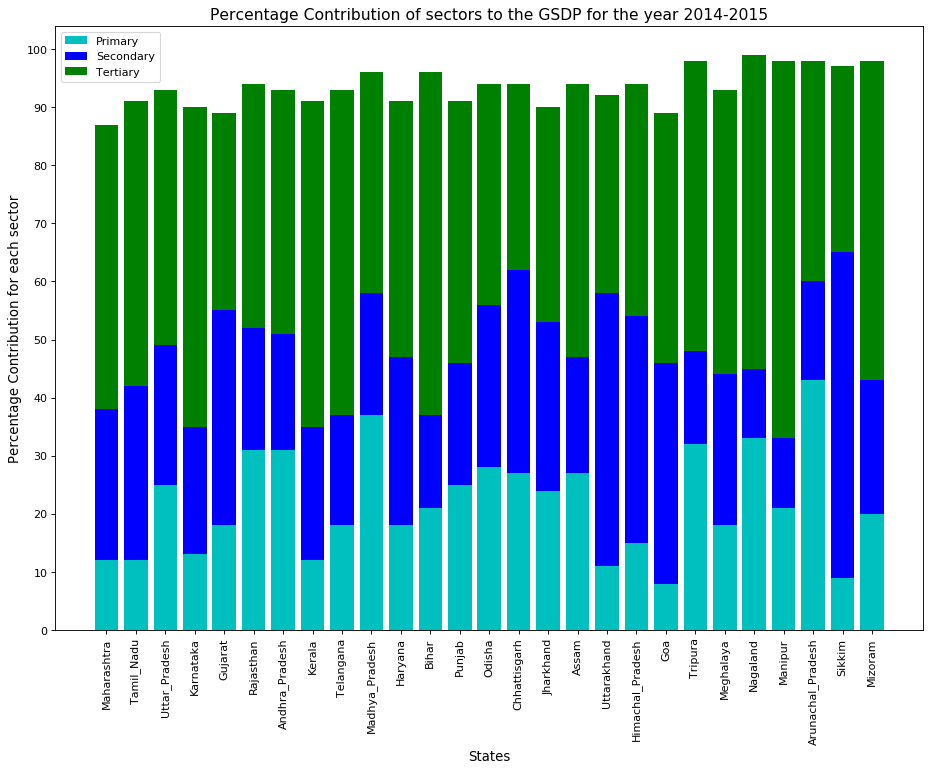

In [373]:
# Plot stacked graph for sectors contribution for each state

plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
width = 0.8
ind = df_GDP_Contri['State']
s1 = np.array(df_GDP_Contri['Primary_Contry'])
s2 = np.array(df_GDP_Contri['Secondary_Contry'])
s3 = np.array(df_GDP_Contri['Tertiary_Contry'])


p1 = plt.bar(ind, s1, width, color='c')
p2 = plt.bar(ind, s2, width, bottom=s1, color='b')
p3 = plt.bar(ind, s3, width, bottom=s1+s2, color='g')

plt.yticks(np.arange(0,110,10),fontsize=10)
plt.title("Percentage Contribution of sectors to the GSDP for the year 2014-2015",fontsize=14)
plt.ylabel("Percentage Contribution for each sector", fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.xlabel('States', fontsize=12)
plt.legend(('Primary', 'Secondary', 'Tertiary'))
plt.show()

#### Notes for the graph Percentage Contribution of sectors to the GSDP(Year 2014-2015)' :
1) The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.<br>
2) % contribution of Primary, Secondary and Tertiary sectors to the Gross State Domestic Product for the states is plotted with  highest GSDP to lowest GSDP(left to right).<br>

#### Key highlights : 
1) Maharashtra with highest GSDP (179212165cr) has 88.07% contribution from Primary(12.14%),Secondary(26.47%) and Tertiary (49.46%) sectors.<br>
2) Mizoram with lowest GSDP (1155933cr) has 98.04% contribution from Primary(19.52%),Secondary(23.36%) and Tertiary(55.16%) sectors.<br> 
3) Almost for all the states, Tertiary sectors's contributing more towards total GSDP compared to secondary followed by Primary,except  Sikkim with contribution Primary(9.12%),Secondary(55.57%) and Tertiary(31.76%)and Arunachal pradesh with Primary(42.77%),Secondary(17.15%) and Tertiary(31.76%) contribution.<br>
4) Highest and lowest contribution from Primary sector to the GSDP is from 42.77 % (Arunachal Pradesh), 7.68% (Goa), respectively.<br>
5) Highest and lowest contribution from Secondary sector to the GSDP is from 55.57 % (Sikkim), 12.20% (Manipur), respectively.<br>
6) Highest and lowest contribution from Tertiary sector to the GSDP is from 65.25 % (Manipur), 31.76% (Sikkim), respectively.<br>


In [385]:
#Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). 
#The quantile values are (0.20,0.5, 0.85, 1)

# First from master dataframe takeout columns which are not required
df_GSDP_detail = df_GSDP_detail.drop(['Primary','Secondary','Tertiary'],axis = 1)

#Format the numeric columns, convert to float with zero decimal places 
df_GSDP_detail[df_GSDP_detail.columns[1:]] = df_GSDP_detail[df_GSDP_detail.columns[1:]].astype(float).round(0)

#sort in descending order
df_GSDP_detail.sort_values(by = 'Per Capita GSDP (Rs.)',ascending = False,inplace = True)
df_GSDP_detail.reset_index(inplace = True,drop = True)


# Categorise based on quantile values
df_GSDP_detail['Category'] = pd.qcut(df_GSDP_detail['Per Capita GSDP (Rs.)'], [0,0.20,0.5, 0.85, 1],labels=['C4','C3','C2','C1'])


df_GSDP_detail.head()

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
0,Goa,308507.0,3622.0,1177608.0,204110.0,165819.0,380927.0,189656.0,233618.0,407099.0,346486.0,180431.0,3597882.0,527279.0,61854.0,4063307.0,14950.0,271793.0,C1
1,Sikkim,137447.0,1329.0,550697.0,212499.0,82058.0,70568.0,47347.0,21079.0,75330.0,119514.0,149265.0,1467133.0,72200.0,18400.0,1520933.0,6330.0,240274.0,C1
2,Haryana,8015238.0,25186.0,7756921.0,1101919.0,3702571.0,4986319.0,2560623.0,1671486.0,6970183.0,1036377.0,2001581.0,39828404.0,4985670.0,1067867.0,43746207.0,266620.0,164077.0,C1
3,Kerala,5930617.0,558824.0,4273567.0,482470.0,7314003.0,8557345.0,4020934.0,2010306.0,7287633.0,2068915.0,5728645.0,48233259.0,5189352.0,822381.0,52600230.0,339843.0,154778.0,C1
4,Uttarakhand,1601423.0,244549.0,5866252.0,433880.0,1342733.0,1743106.0,1066693.0,385030.0,831307.0,579409.0,982430.0,15076812.0,1434856.0,313139.0,16198529.0,105820.0,153076.0,C2


For further analysis, states are categorized into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1)

1. States belong to category C1 (GDP Per Capita is >= 154778 Rs.) are Goa, Sikkim, Haryana, Kerala.
2. States belong to category C2 (GDP Per Capita is >= 112718 Rs.) are Uttarakhand, Maharashtra, Himachal Pradesh, Tamil_Nadu , Karnataka, Gujarat, Telangana, Punjab, Arunachal_Pradesh.
3. States belong to category C3 (GDP Per Capita is >= 73979 Rs.) are Andhra Pradesh, Mizoram, Nagaland, Chhattisgarh, Rajasthan, Tripura, Meghalaya, Odisha.
4. States belong to category C4 (GDP Per Capita is <= 62989 Rs.) are Madhya Pradesh, Jharkhand, Assam, Manipur, Uttar Pradesh, Bihar.  


In [225]:

df_C1 = df_GSDP_detail[df_GSDP_detail['Category']== 'C1']
C1_statename = list(df_C1['State'])
df_C1 = df_C1.iloc[:,1:-1]
df_C1
df_C1 = df_C1.T
df_C1.columns = C1_statename
df_C1.insert(0,'Item',df_C1.index)
df_C1= df_C1.reset_index(drop = True)
df_C1['Subsector_sum']= df_C1.sum(axis = 1)
df_C1['%Contri to GSDP'] = round((df_C1['Subsector_sum']/df_C1.iloc[14]['Subsector_sum'])*100,2)
df_C1 = df_C1[0:11]
df_C1.sort_values(by = '%Contri to GSDP',inplace = True,ascending = False)

#find cumulative sum of % contribution
df_C1['%Contri to GSDP_sum'] = np.cumsum(df_C1['%Contri to GSDP'])
df_C1.reset_index(drop = True,inplace = True)

# sectors contributing 80%(approx) to total % of GSDP
df_C1 = df_C1[df_C1['%Contri to GSDP_sum']<= 80]

print("Details of sectors contributing 80%(approx) to total % of GSDP for states from C1 category : ")
df_C1.head()



Details of sectors contributing 80%(approx) to total % of GSDP for states from C1 category : 


,Item,Goa,Sikkim,Haryana,Kerala,Subsector_sum,%Contri to GSDP,%Contri to GSDP_sum
0,"Real estate, ownership of dwelling & professio...",407099.0,75330.0,6970183.0,7287633.0,14740245.0,14.46,14.46
1,"Agriculture, forestry and fishing",308507.0,137447.0,8015238.0,5930617.0,14391809.0,14.12,28.58
2,"Trade, repair, hotels and restaurants",380927.0,70568.0,4986319.0,8557345.0,13995159.0,13.73,42.31
3,Manufacturing,1177608.0,550697.0,7756921.0,4273567.0,13758793.0,13.50,55.81
4,Construction,165819.0,82058.0,3702571.0,7314003.0,11264451.0,11.05,66.86


States belong to category C1 are ['Goa', 'Sikkim', 'Haryana', 'Kerala']


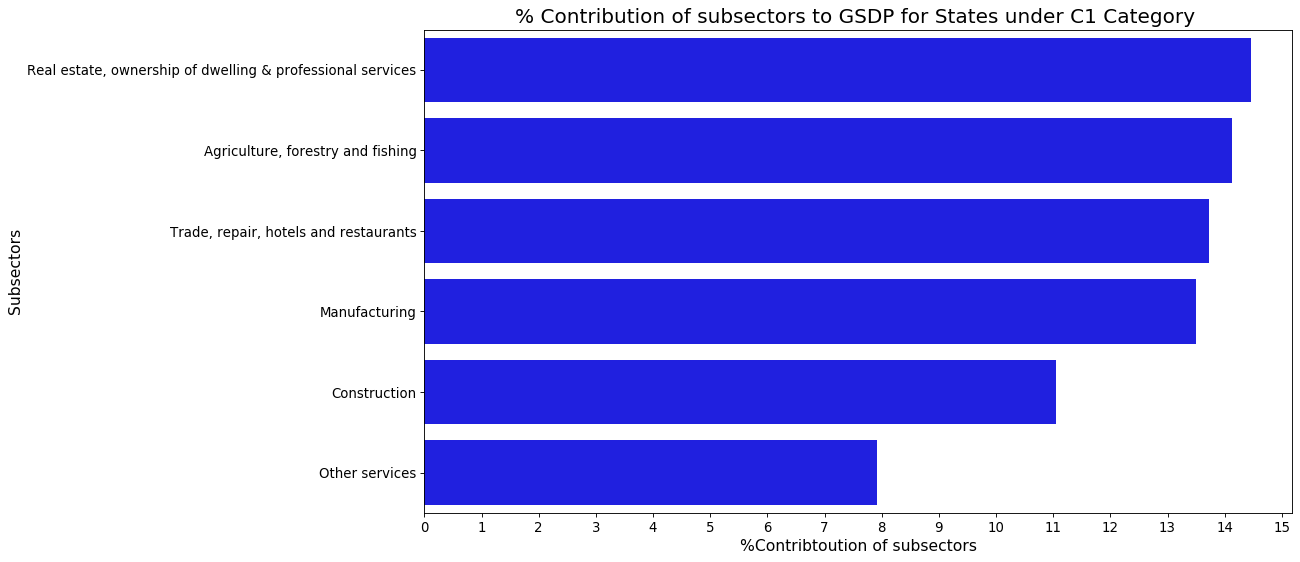

In [143]:
# Plot subsectors contribution to GSDP for C1 category states
print("States belong to category C1 are {}".format(C1_statename))
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = '%Contri to GSDP',y = 'Item',data = df_C1,color = "blue")
plt.xticks(np.arange(0,16,1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('% Contribution of subsectors to GSDP for States under C1 Category ',fontsize=18)
plt.xlabel("%Contribtoution of subsectors",fontsize=14)
plt.ylabel("Subsectors",fontsize=14)
plt.show()

Notes from the graph :
1. States belong to category C1 are 'Goa', 'Sikkim', 'Haryana', 'Kerala'. Above graph shows contribution of subsectors which contributes 80 %(approx) to the GSDP.


In [146]:
df_C2 = df_GSDP_detail[df_GSDP_detail['Category']== 'C2']
C2_statename = list(df_C2['State'])
df_C2 = df_C2.iloc[:,1:-1]
df_C2 = df_C2.T
df_C2.columns = C2_statename
df_C2.insert(0,'Item',df_C2.index)
df_C2= df_C2.reset_index(drop = True)
df_C2['Subsector_sum']= df_C2.sum(axis = 1)
df_C2['%Contri to GSDP'] = round((df_C2['Subsector_sum']/df_C2.iloc[14]['Subsector_sum'])*100,2)
df_C2 = df_C2[0:11]
df_C2.sort_values(by = '%Contri to GSDP',inplace = True,ascending = False)

#find cumulative sum of % contribution
df_C2['%Contri to GSDP_sum'] = np.cumsum(df_C2['%Contri to GSDP'])
df_C2.reset_index(drop = True,inplace = True)

# sectors contributing 80%(approx) to total % of GSDP
df_C2 = df_C2[df_C2['%Contri to GSDP_sum']<= 80]

print("Details of sectors contributing 80%(approx) to total % of GSDP for states from C2 category : ")
df_C2

Details of sectors contributing 80%(approx) to total % of GSDP for states from C2 category : 


,Item,Uttarakhand,Maharashtra,Himachal_Pradesh,Tamil_Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal_Pradesh,Subsector_sum,%Contri to GSDP,%Contri to GSDP_sum
0,Manufacturing,5866252.0,33660294.0,2543637.0,18914794.0,12953843.0,24087538.0,6353711.0,4790341.0,26120.0,109196530.0,18.62,18.62
1,"Real estate, ownership of dwelling & professio...",831307.0,30718051.0,1125937.0,16830213.0,24766393.0,5179502.0,9478839.0,3142786.0,48418.0,92121446.0,15.71,34.33
2,"Agriculture, forestry and fishing",1601423.0,16475655.0,1514981.0,13064238.0,11219422.0,13769969.0,7591501.0,9285716.0,686117.0,75209022.0,12.83,47.16
3,"Trade, repair, hotels and restaurants",1743106.0,15839100.0,615496.0,12895842.0,8991658.0,10178713.0,6494607.0,4419919.0,60421.0,61238862.0,10.44,57.60
4,Construction,1342733.0,9450211.0,808256.0,12216718.0,6104799.0,5526017.0,2854024.0,2202962.0,147842.0,40653562.0,6.93,64.53
5,Financial services,385030.0,16143324.0,362521.0,5598498.0,4094169.0,4606644.0,3023729.0,2057520.0,25207.0,36296642.0,6.19,70.72
6,Other services,982430.0,10806363.0,923164.0,7430115.0,5308174.0,3123413.0,4158229.0,3303041.0,218728.0,36253657.0,6.18,76.90


States belong to category C2 are ['Uttarakhand', 'Maharashtra', 'Himachal_Pradesh', 'Tamil_Nadu', 'Karnataka', 'Gujarat', 'Telangana', 'Punjab', 'Arunachal_Pradesh']


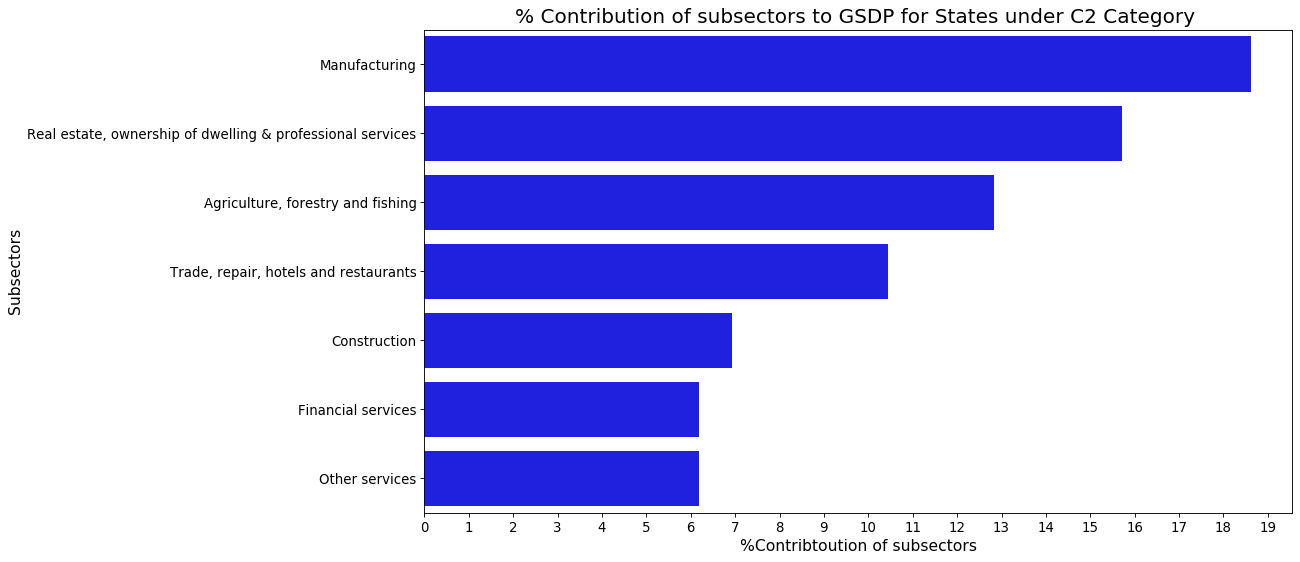

In [148]:
# Plot subsectors contribution to GSDP for C2 category states
print("States belong to category C2 are {}".format(C2_statename))
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = '%Contri to GSDP',y = 'Item',data = df_C2,color = "blue")
plt.xticks(np.arange(0,20,1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('% Contribution of subsectors to GSDP for States under C2 Category ',fontsize=18)
plt.xlabel("%Contribtoution of subsectors",fontsize=14)
plt.ylabel("Subsectors",fontsize=14)
plt.show()

In [386]:
df_C3 = df_GSDP_detail[df_GSDP_detail['Category']== 'C3']
C3_statename = list(df_C3['State'])
df_C3 = df_C3.iloc[:,1:-1]
df_C3 = df_C3.T
df_C3.columns = C3_statename
df_C3.insert(0,'Item',df_C3.index)
df_C3= df_C3.reset_index(drop = True)
df_C3['Subsector_sum']= df_C3.sum(axis = 1)
df_C3['%Contri to GSDP'] = round((df_C3['Subsector_sum']/df_C3.iloc[14]['Subsector_sum'])*100,2)
df_C3 = df_C3[0:11]
df_C3.sort_values(by = '%Contri to GSDP',inplace = True,ascending = False)

#find cumulative sum of % contribution
df_C3['%Contri to GSDP_sum'] = np.cumsum(df_C3['%Contri to GSDP'])
df_C3.reset_index(drop = True,inplace = True)

# sectors contributing 80%(approx) to total % of GSDP
df_C3 = df_C3[df_C3['%Contri to GSDP_sum']<= 80]

print("Details of sectors contributing 80%(approx) to total % of GSDP for states from C3 category : ")
df_C3



Details of sectors contributing 80%(approx) to total % of GSDP for states from C3 category : 


,Item,Andhra_Pradesh,Mizoram,Nagaland,Chhattisgarh,Rajasthan,Tripura,Meghalaya,Odisha,Subsector_sum,%Contri to GSDP,%Contri to GSDP_sum
0,"Agriculture, forestry and fishing",14819416.0,217010.0,607897.0,3948847.0,15044394.0,799825.0,366521.0,6422978.0,42226888.0,23.73,23.73
1,Manufacturing,4672266.0,8479.0,18346.0,4370593.0,6552580.0,228625.0,433213.0,5754229.0,22038331.0,12.38,36.11
2,"Trade, repair, hotels and restaurants",4233400.0,114315.0,140781.0,1535571.0,7297290.0,390423.0,383974.0,3149555.0,17245309.0,9.69,45.80
3,"Real estate, ownership of dwelling & professio...",4405409.0,55068.0,159651.0,2462166.0,6451997.0,190704.0,150409.0,2348714.0,16224118.0,9.12,54.92
4,Construction,4664889.0,133228.0,156072.0,2669855.0,5353326.0,177899.0,150256.0,2402396.0,15707921.0,8.83,63.75
5,Other services,4215389.0,186222.0,259186.0,1112232.0,4164287.0,323287.0,214211.0,2340603.0,12815417.0,7.20,70.95
6,"Transport, storage, communication & services r...",5076984.0,52587.0,77521.0,871770.0,3814461.0,155956.0,148189.0,2034016.0,12231484.0,6.87,77.82


States belong to category C3 are ['Andhra_Pradesh', 'Mizoram', 'Nagaland', 'Chhattisgarh', 'Rajasthan', 'Tripura', 'Meghalaya', 'Odisha']


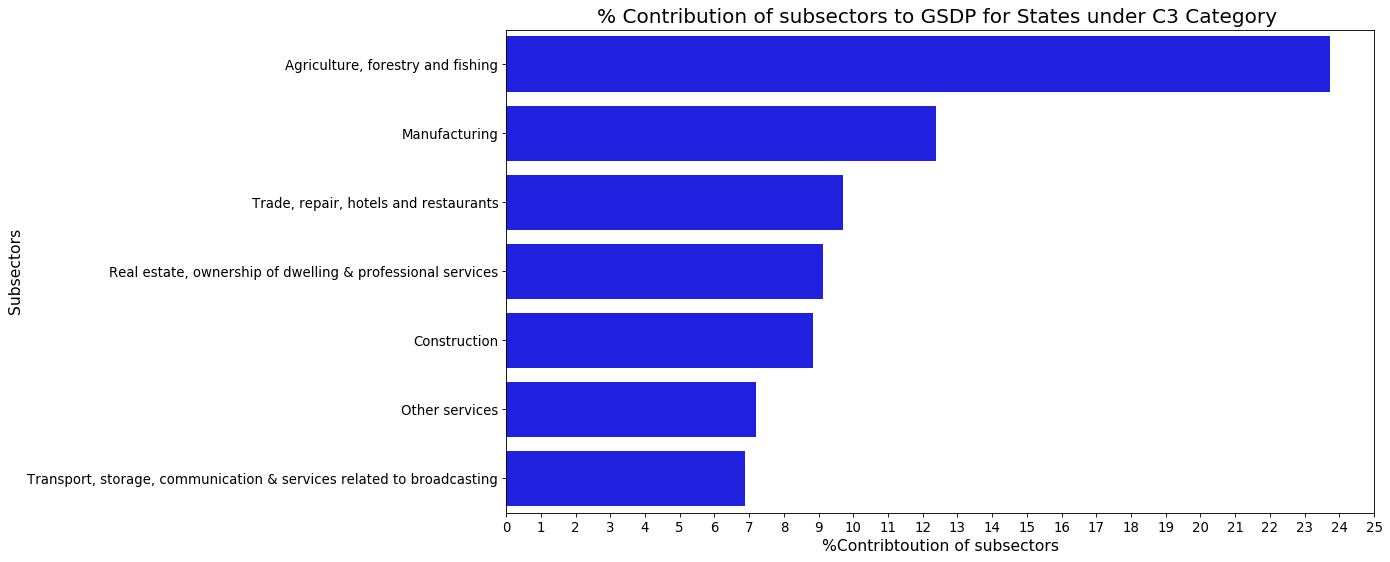

In [387]:
# Plot subsectors contribution to GSDP for C3 category states
print("States belong to category C3 are {}".format(C3_statename))
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = '%Contri to GSDP',y = 'Item',data = df_C3,color = "blue")
plt.xticks(np.arange(0,26,1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('% Contribution of subsectors to GSDP for States under C3 Category ',fontsize=18)
plt.xlabel("%Contribtoution of subsectors",fontsize=14)
plt.ylabel("Subsectors",fontsize=14)
plt.show()

In [388]:
df_C4 = df_GSDP_detail[df_GSDP_detail['Category']== 'C4']
C4_statename = list(df_C4['State'])
df_C4 = df_C4.iloc[:,1:-1]
df_C4 = df_C4.T
df_C4.columns = C4_statename
df_C4.insert(0,'Item',df_C4.index)
df_C4= df_C4.reset_index(drop = True)
df_C4['Subsector_sum']= df_C4.sum(axis = 1)
df_C4['%Contri to GSDP'] = round((df_C4['Subsector_sum']/df_C4.iloc[14]['Subsector_sum'])*100,2)
df_C4 = df_C4[0:11]
df_C4.sort_values(by = '%Contri to GSDP',inplace = True,ascending = False)

#find cumulative sum of % contribution
df_C4['%Contri to GSDP_sum'] = np.cumsum(df_C4['%Contri to GSDP'])
df_C4.reset_index(drop = True,inplace = True)

# sectors contributing 80%(approx) to total % of GSDP
df_C4 = df_C4[df_C4['%Contri to GSDP_sum']<= 80]

print("Details of sectors contributing 80%(approx) to total % of GSDP for states from C4 category : ")
df_C4


Details of sectors contributing 80%(approx) to total % of GSDP for states from C4 category : 


,Item,Madhya_Pradesh,Jharkhand,Assam,Manipur,Uttar_Pradesh,Bihar,Subsector_sum,%Contri to GSDP,%Contri to GSDP_sum
0,"Agriculture, forestry and fishing",16235647.0,3211065.0,3855548.0,383140.0,25097754.0,7951890.0,56735044.0,24.32,24.32
1,"Trade, repair, hotels and restaurants",5357515.0,1991359.0,2987155.0,262950.0,9437243.0,7448373.0,27484595.0,11.78,36.10
2,Manufacturing,4368833.0,4114148.0,2002936.0,49501.0,12261649.0,2189965.0,24987032.0,10.71,46.81
3,"Real estate, ownership of dwelling & professio...",2660123.0,1656784.0,1412466.0,159335.0,14548185.0,3740641.0,24177534.0,10.37,57.18
4,Construction,4403151.0,1789834.0,1733568.0,143182.0,11256450.0,3449763.0,22775948.0,9.76,66.94
5,"Transport, storage, communication & services r...",2865802.0,1470022.0,1194568.0,109726.0,7404509.0,3147173.0,16191800.0,6.94,73.88


States belong to category C4 are ['Madhya_Pradesh', 'Jharkhand', 'Assam', 'Manipur', 'Uttar_Pradesh', 'Bihar']


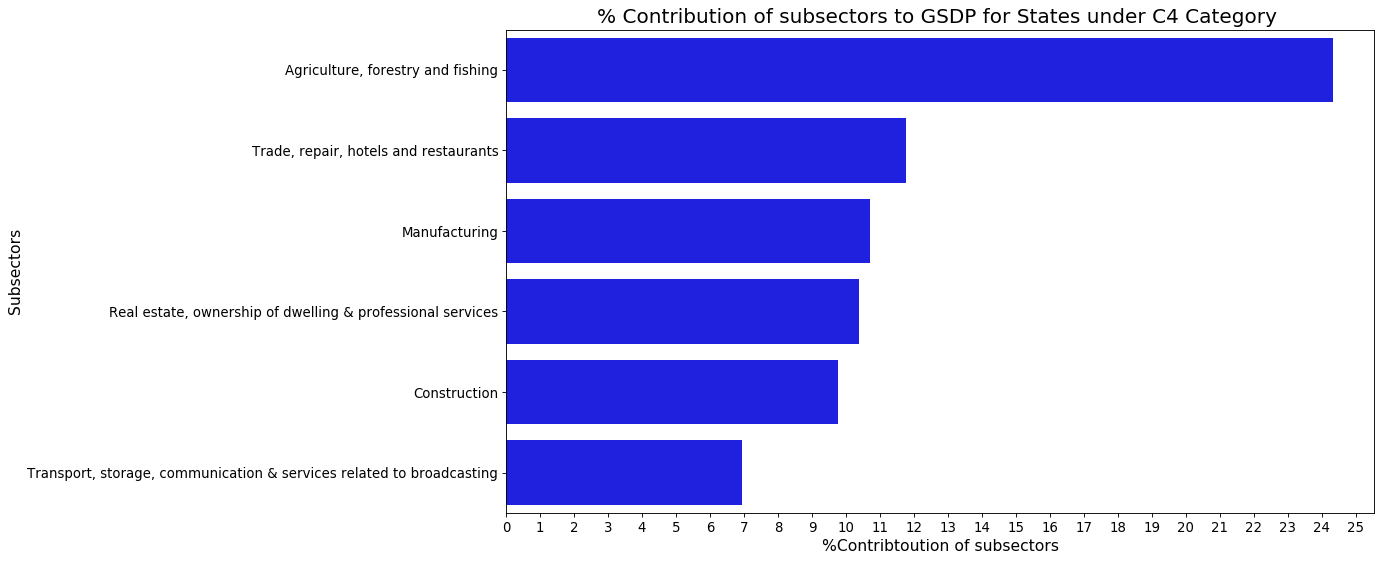

In [389]:
# Plot subsectors contribution to GSDP for C4 category states
print("States belong to category C4 are {}".format(C4_statename))
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = '%Contri to GSDP',y = 'Item',data = df_C4,color = "blue")
plt.xticks(np.arange(0,26,1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('% Contribution of subsectors to GSDP for States under C4 Category ',fontsize=18)
plt.xlabel("%Contribtoution of subsectors",fontsize=14)
plt.ylabel("Subsectors",fontsize=14)
plt.show()

#### Key highlights from the graphs plotted for the subsectors contributing 80% toward total GSDP for C1,C2,C3,C4 category :<br>
1) For C1 category states, total 5 subsectors are contributing towards 80% of total GSDP. There is no significant difference for four highest contributions, all subsector’s are contributing in the range of 13.50 to 14.46 %
Real estate, ownership of dwelling & professional services(14.46) followed by Agriculture, forestry and fishing(14.12). Least is from Construction(11.05).<br>
2) For C2 category states, total 7 subsectors are contributing towards 80% of total GSDP. There is significant difference in contributions from each subsectors.
Manufacturing(18.62) followed by Real estate, ownership of dwelling & professional services(15.71). Least is from Other Services(6.18).<br>
3) For C3 category states, total 7 subsectors are contributing towards 80% of total GSDP. There is huge difference in contributions from  subsector at top against bottom. Unlike C1 and C2 category C3 has more contribution from Agriculture sector.<br>
Agriculture, forestry and fishing(23.73) followed by Manufacturing (12.38). Least is from Transport, storage, communication & services related to broadcasting (6.87).<br> 
4) For C4 category states, total 6 subsectors are contributing towards 80% of total GSDP. There is huge difference in contributions from  subsector at top against bottom. Unlike C1 and C2 category C4 has more contribution from Agriculture, forestry and fishing (primary sector.).<br>
Agriculture, forestry and fishing (24.32) followed by Trade, repair, hotels and restaurants (11.78). Least is from Transport, storage, communication & services related to broadcasting (6.94) 
5) Category belong to low GDP per capita (C3 and C4 ) have more contributions from primary sectors.<br>
6) Subsector -  Real estate, ownership of dwelling & professional services  contributing more towards states with high GDP per capita.<br>
7) Subsector with least contribution from each sector need to focus on improving the share in contribution.


#### Recomndations :

1.C1 category state (Goa, Sikkim, Haryana, Kerala). Among these states Goa, Sikkim & Kerala are popular for tourism . Need to promote more to attract tourists.

2.C2 category most of the states have huge population involved in Agriculture , subsidies to farmers on loans and use of technology in farming should be introduced.

3.For C3 and C4 , subsector Transport, storage, communication & services related to broadcasting should be improved by constructing Roads(national highways) to boost transport, constructing leakproof grain storage buildings for farmers. 


# Part  II :

In [252]:
df_DOR = pd.read_csv(path_DOR)

# Filter UT's from df
UT_list = ['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry','Jammu and Kashmir','West Bengal', 'All India']

df_DOR = df_DOR.loc[ df_DOR['Level of Education - State'].apply(lambda x : False if x.strip() in UT_list else True)]

# correct the state name as per file created in Part I B
#  1.list of columns from df_DOR, which are not matching with that of in df_percapita
col_list = list(df_percapita['State'])
#  2.missing_col = [x for x in df_DOR['Level of Education - State'] if x.strip() not in col_list] 

coltocorrect = ['Andhra Pradesh', 'Arunachal Pradesh', 'Chhatisgarh', 'Himachal Pradesh','Madhya Pradesh', 'Tamil Nadu', 'Uttar Pradesh', 'Uttrakhand']
corrected_col = ['Andhra_Pradesh', 'Arunachal_Pradesh','Chhattisgarh', 'Himachal_Pradesh','Madhya_Pradesh', 'Tamil_Nadu', 'Uttar_Pradesh', 'Uttarakhand']

# replace and correct the column names
df_DOR['Level of Education - State'].replace(coltocorrect,corrected_col,inplace = True)

# Select columns Primary, Upper primary and secondary for the year 2014 -2015

df_DOR = df_DOR[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

# rename col name to join df's
df_DOR.rename({'Level of Education - State':'State'},axis = 1,inplace = True)

# Merge the data df_DOR and df_percapita data based on states name
df_DOR_percapita = pd.merge(df_DOR,df_percapita,how = 'inner',on = 'State' )

# sort data by Per Capita GSDP (Rs.)
df_DOR_percapita.sort_values(by = 'Per Capita GSDP (Rs.)',inplace = True,ascending = False)
df_DOR_percapita

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
5,Goa,0.20,0.07,11.15,271793
21,Sikkim,4.57,1.57,15.89,240274
7,Haryana,0.41,5.81,15.89,164077
11,Kerala,NaN,NaN,12.32,154778
26,Uttarakhand,3.07,1.19,10.40,153076
13,Maharashtra,0.55,1.79,12.87,152853
8,Himachal_Pradesh,0.46,0.87,6.07,147330
22,Tamil_Nadu,0.46,NaN,8.10,146503
10,Karnataka,2.32,3.85,26.18,145141
6,Gujarat,0.76,6.41,25.04,141263


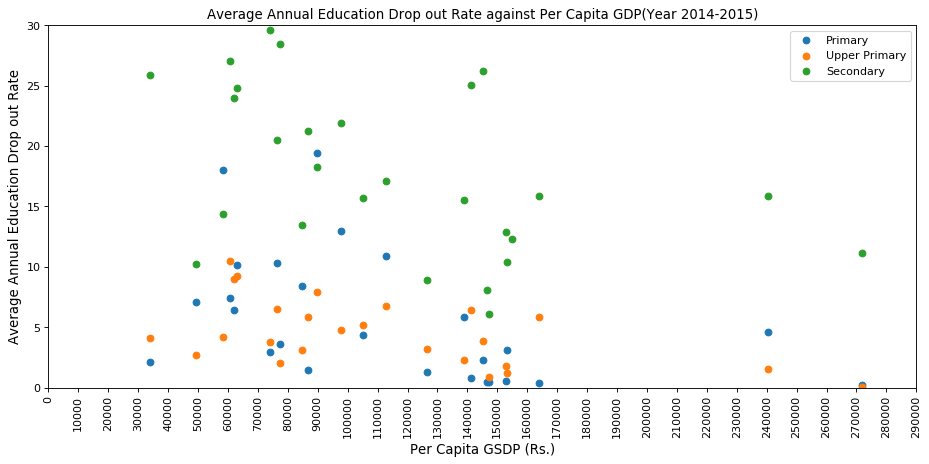

In [340]:
# 1. plot the data for Education level drop out rate - 2014-2015 vs Per Capita GSDP (Rs.) for all states


y1 = df_DOR_percapita['Primary - 2014-2015']
y2 = df_DOR_percapita['Upper Primary - 2014-2015']
y3 = df_DOR_percapita['Secondary - 2014-2015']
x = df_DOR_percapita['Per Capita GSDP (Rs.)']

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x,y1)
plt.scatter(x,y2)
plt.scatter(x,y3)
plt.xticks(np.arange(0,300000,10000),rotation=90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim([0,30])
plt.title("Average Annual Education Drop out Rate against Per Capita GDP(Year 2014-2015)",fontsize = 12)
plt.xlabel("Per Capita GSDP (Rs.)",fontsize = 12)
plt.ylabel("Average Annual Education Drop out Rate",fontsize = 12)
plt.legend(('Primary','Upper Primary','Secondary'))
plt.show()
plt.show()
plt.show()

#### Notes for the graph 'Average Annual Education Drop out Rate against Per Capita GDP' : 
1) On x axis Per Capita GDP (Rs.) is plotted for all the states for the year 2014-2015 in ascending order
2) on Y axis Average Annual Education Drop out Rate for all the states for the year 2014-2015 in ascending order
3) Drop out rate is not available for Kerala and its mentioned as NA in datasheet.<br>
Key highlights : 
1. For Primary Education Level, drop out rate is high as 19.41% for Nagaland(89607Rs) and lowest as 0.20% for Goa(271793Rs).
2. For Primary Upper Education Level, drop out rate is high as 10.51% for Assam(60621Rs) and lowest as 0.07% for Goa(271793Rs).
3. For Secondary Education Level, drop out rate is high as 29.56% for Odisha(73979Rs) and lowest as 6.07% for Himachal_Pradesh(147330Rs).
4. However drop out rate is high for the states with range of per Capita GDP(60000 - 150000 Rs) for all                  primary,upper primary and secondary
5. Among the three, drop out rate for Secondary is highest followed by Primary and Upper Primary education level.

#### Reccomondation : 

1.Spread awareness on importance of primary education.<br>
2.Education Infrastructure to be improved in the states with range of per capita GDP(60000 - 150000 Rs).<br>
3.Introduce education schemes,provide scholarships.<br>
4.Spread awareness on employment prospects to boost secondary education